In [1]:
import pandas as pd
import numpy as np
import os
import shutil
import zipfile

In [2]:
!mkdir 'labeled_data'

In [3]:
# Open the folder
%cd /Users/javidkarimi/Desktop/DS_Projects/MY_Machine Learning Projects/uw-madison/ThesisCode/31_03_23

/Users/javidkarimi/Desktop/DS_Projects/MY_Machine Learning Projects/uw-madison/ThesisCode/31_03_23


In [4]:

import glob

def count_files(root_dir):
    count_file=0
    for root, dirs, files in os.walk(root_dir):
        for f in files: 
            if f.endswith('.png'):
                count_file +=1
    print(f'number fo images: ',count_file)


In [5]:
count_files('Data/train')

number fo images:  0


In [60]:
import os
import glob

def search_files(root_dir):
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if not file.endswith('.png'):
                print(os.path.join(subdir, file))


In [61]:
search_files('Data/train')

Data/train/.csv


In [62]:
import os
import glob
import os

def search_and_delete_files(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if not file.endswith(".png"):
                file_path = os.path.join(root, file)
                os.remove(file_path)
                print(f"Deleted file: {file_path}")

In [63]:
search_and_delete_files('Data/train')

Deleted file: Data/train/.csv


In [64]:
# Create empty lists to store the images information
id = list()
size_x = list()
size_y = list()
spacing_x = list()
spacing_y = list()
case = list()
day = list()
slice_id = list()

In [65]:
# Rename the images to match with the id column in train tables
des_dir = os.path.join('labeled_data')

for root, dirs, files in os.walk('Data/train'):
    for f in files:
        f_n = root.split('/')[3] + '_' + f.split('_')[0] + '_' + f.split('_')[1]
        id.append(f_n)
        size_x.append(f.split('_')[2])
        size_y.append(f.split('_')[3])
        spacing_x.append(f.split('_')[4])
        spacing_y.append(f.split('_')[5][:4])
        case.append(root.split('/')[-2].split('_')[0])
        day.append(root.split('/')[-2].split('_')[1])
        slice_id.append(f.split('_')[0] + '_' + f.split('_')[1])

        new_name = f_n + '.png'
        dir_to_move = os.path.join(root,f)
        des_dir = os.path.join('labeled_data', new_name)
        shutil.move(dir_to_move, des_dir)

In [66]:

df_info = pd.DataFrame(data=list(zip(id, case, day, slice_id, size_x, size_y, spacing_x, spacing_y)), 
                       columns=['id', 'case', 'day', 'slice_id', 'size_x', 'size_y', 'spacing_x', 'spacing_y'])

df_info.head()

id    case   day    slice_id size_x size_y spacing_x  \
0  case22_day0_slice_0131  case22  day0  slice_0131    266    266      1.50   
1  case22_day0_slice_0032  case22  day0  slice_0032    266    266      1.50   
2  case22_day0_slice_0084  case22  day0  slice_0084    266    266      1.50   
3  case22_day0_slice_0092  case22  day0  slice_0092    266    266      1.50   
4  case22_day0_slice_0024  case22  day0  slice_0024    266    266      1.50   

  spacing_y  
0      1.50  
1      1.50  
2      1.50  
3      1.50  
4      1.50

In [67]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38496 entries, 0 to 38495
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         38496 non-null  object
 1   case       38496 non-null  object
 2   day        38496 non-null  object
 3   slice_id   38496 non-null  object
 4   size_x     38496 non-null  object
 5   size_y     38496 non-null  object
 6   spacing_x  38496 non-null  object
 7   spacing_y  38496 non-null  object
dtypes: object(8)
memory usage: 2.3+ MB


In [68]:

# Directory of the labelled images
image_dir = os.path.join('labeled_data')
image_labels = os.listdir(image_dir)
print(image_labels[:10])

['case125_day16_slice_0056.png', 'case135_day0_slice_0136.png', 'case78_day22_slice_0008.png', 'case113_day16_slice_0034.png', 'case89_day19_slice_0057.png', 'case131_day23_slice_0095.png', 'case123_day22_slice_0056.png', 'case139_day0_slice_0030.png', 'case130_day0_slice_0044.png', 'case77_day0_slice_0063.png']


In [69]:
print(len(image_labels))


38496


In [72]:

# Add the segmentation info to the dataframe
rle_info = pd.read_csv('Data/train.csv')
rle_info.head()

id        class segmentation
0  case123_day20_slice_0001  large_bowel          NaN
1  case123_day20_slice_0001  small_bowel          NaN
2  case123_day20_slice_0001      stomach          NaN
3  case123_day20_slice_0002  large_bowel          NaN
4  case123_day20_slice_0002  small_bowel          NaN

In [73]:

rle_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115488 entries, 0 to 115487
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            115488 non-null  object
 1   class         115488 non-null  object
 2   segmentation  33913 non-null   object
dtypes: object(3)
memory usage: 2.6+ MB


In [74]:
rle_info = rle_info.dropna()
rle_info.info()
     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33913 entries, 194 to 115465
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            33913 non-null  object
 1   class         33913 non-null  object
 2   segmentation  33913 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [75]:
image_df = df_info.merge(rle_info, how='inner', left_on='id', right_on='id', copy=False)
image_df.head(10)

id    case   day    slice_id size_x size_y spacing_x  \
0  case22_day0_slice_0131  case22  day0  slice_0131    266    266      1.50   
1  case22_day0_slice_0131  case22  day0  slice_0131    266    266      1.50   
2  case22_day0_slice_0084  case22  day0  slice_0084    266    266      1.50   
3  case22_day0_slice_0092  case22  day0  slice_0092    266    266      1.50   
4  case22_day0_slice_0092  case22  day0  slice_0092    266    266      1.50   
5  case22_day0_slice_0127  case22  day0  slice_0127    266    266      1.50   
6  case22_day0_slice_0127  case22  day0  slice_0127    266    266      1.50   
7  case22_day0_slice_0115  case22  day0  slice_0115    266    266      1.50   
8  case22_day0_slice_0115  case22  day0  slice_0115    266    266      1.50   
9  case22_day0_slice_0078  case22  day0  slice_0078    266    266      1.50   

  spacing_y        class                                       segmentation  
0      1.50  large_bowel  29647 4 29895 4 29906 13 30155 31 30419 33 306...  
1      1.50  small_bowel  30756 8 31020 13 31284 17 31548 21 31814 23 32...  
2      1.50      stomach  23582 14 23846 17 24110 21 24375 25 24640 28 2...  
3      1.50  small_bowel  28593 4 28856 8 29120 11 29385 12 29651 13 299...  
4      1.50      stomach  25171 2 25175 1 25433 11 25697 14 25961 18 262...  
5      1.50  large_bowel  29383 5 29408 6 29646 12 29665 20 29892 10 299...  
6      1.50  small_bowel  30498 2 30761 7 31025 10 31290 12 31556 13 318...  
7      1.50  large_bowel  27798 14 28061 18 28088 6 28325 23 28350 13 28...  
8      1.50  small_bowel  30499 2 30764 5 31029 7 31244 7 31295 8 31508 ...  
9      1.50      stomach  25444 6 25708 13 25973 16 26238 18 26504 20 26...

In [76]:
image_df.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33913 entries, 0 to 33912
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            33913 non-null  object
 1   case          33913 non-null  object
 2   day           33913 non-null  object
 3   slice_id      33913 non-null  object
 4   size_x        33913 non-null  object
 5   size_y        33913 non-null  object
 6   spacing_x     33913 non-null  object
 7   spacing_y     33913 non-null  object
 8   class         33913 non-null  object
 9   segmentation  33913 non-null  object
dtypes: object(10)
memory usage: 2.8+ MB


In [ ]:
# Save image_info dataframe
image_df.to_csv(path_or_buf='Data/image_df.csv', index=False)

#  Data Visualization

In [78]:

import pandas as pd
import numpy as np
import os
import shutil
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import imageio
from PIL import Image
import seaborn as sns
import cv2 as cv

sns.set_style('ticks')
sns.set_context('talk')

%matplotlib inline

2023-03-31 06:40:20.603197: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [80]:

# Read dataframes consisting of image information and segmentation
image_df = pd.read_csv('Data/image_df.csv')

# On Kaggel page of competiton, it was explained that the first value of the image label is height and the second value is the width. I mislabeled them in the original DF. 
# I corrected it in the following dataframe.
image_df.columns = ['id', 'case', 'day', 'slice_id', 'size_y', 'size_x', 'spacing_y', 'spacing_x', 'class', 'segmentation']

image_df.head(10)

id    case   day    slice_id  size_y  size_x  \
0  case22_day0_slice_0131  case22  day0  slice_0131     266     266   
1  case22_day0_slice_0131  case22  day0  slice_0131     266     266   
2  case22_day0_slice_0084  case22  day0  slice_0084     266     266   
3  case22_day0_slice_0092  case22  day0  slice_0092     266     266   
4  case22_day0_slice_0092  case22  day0  slice_0092     266     266   
5  case22_day0_slice_0127  case22  day0  slice_0127     266     266   
6  case22_day0_slice_0127  case22  day0  slice_0127     266     266   
7  case22_day0_slice_0115  case22  day0  slice_0115     266     266   
8  case22_day0_slice_0115  case22  day0  slice_0115     266     266   
9  case22_day0_slice_0078  case22  day0  slice_0078     266     266   

   spacing_y  spacing_x        class  \
0        1.5        1.5  large_bowel   
1        1.5        1.5  small_bowel   
2        1.5        1.5      stomach   
3        1.5        1.5  small_bowel   
4        1.5        1.5      stomach   
5        1.5        1.5  large_bowel   
6        1.5        1.5  small_bowel   
7        1.5        1.5  large_bowel   
8        1.5        1.5  small_bowel   
9        1.5        1.5      stomach   

                                        segmentation  
0  29647 4 29895 4 29906 13 30155 31 30419 33 306...  
1  30756 8 31020 13 31284 17 31548 21 31814 23 32...  
2  23582 14 23846 17 24110 21 24375 25 24640 28 2...  
3  28593 4 28856 8 29120 11 29385 12 29651 13 299...  
4  25171 2 25175 1 25433 11 25697 14 25961 18 262...  
5  29383 5 29408 6 29646 12 29665 20 29892 10 299...  
6  30498 2 30761 7 31025 10 31290 12 31556 13 318...  
7  27798 14 28061 18 28088 6 28325 23 28350 13 28...  
8  30499 2 30764 5 31029 7 31244 7 31295 8 31508 ...  
9  25444 6 25708 13 25973 16 26238 18 26504 20 26...

In [81]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33913 entries, 0 to 33912
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            33913 non-null  object 
 1   case          33913 non-null  object 
 2   day           33913 non-null  object 
 3   slice_id      33913 non-null  object 
 4   size_y        33913 non-null  int64  
 5   size_x        33913 non-null  int64  
 6   spacing_y     33913 non-null  float64
 7   spacing_x     33913 non-null  float64
 8   class         33913 non-null  object 
 9   segmentation  33913 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 2.6+ MB


In [82]:

image_df.groupby('class')['case'].count()

class
large_bowel    14085
small_bowel    11201
stomach         8627
Name: case, dtype: int64

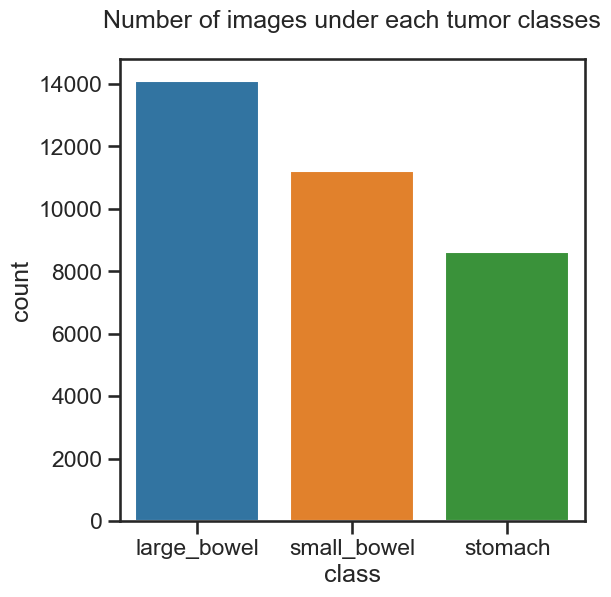

In [84]:
plt.figure(figsize=(6, 6))

sns.countplot(data=image_df, x='class')
plt.title('Number of images under each tumor classes', y=1.05)
plt.show()

The largest number of cases belong to the large bowel class. It should be noted that a specific case may belong to more than one class. Therefore, I create a dataframe with unique ids to count the number of images under combined classes.

In [85]:
image_df_unique = image_df.drop_duplicates(subset=['id'], keep='first')

for i in range(image_df_unique.shape[0]):
  id = image_df_unique['id'].iloc[i]
  classes = image_df[image_df['id']==id]['class']
  segments = image_df[image_df['id']==id]['segmentation']
  image_df_unique['class'].iloc[i] = '+'.join(classes)
  image_df_unique['segmentation'].iloc[i] = '+'.join(segments)

image_df_unique.head(10)

/var/folders/cr/w40k5shj6jx8p9z2hxjbn2l40000gn/T/ipykernel_7454/4016222355.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_df_unique['class'].iloc[i] = '+'.join(classes)
/var/folders/cr/w40k5shj6jx8p9z2hxjbn2l40000gn/T/ipykernel_7454/4016222355.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_df_unique['segmentation'].iloc[i] = '+'.join(segments)


id    case   day    slice_id  size_y  size_x  \
0   case22_day0_slice_0131  case22  day0  slice_0131     266     266   
2   case22_day0_slice_0084  case22  day0  slice_0084     266     266   
3   case22_day0_slice_0092  case22  day0  slice_0092     266     266   
5   case22_day0_slice_0127  case22  day0  slice_0127     266     266   
7   case22_day0_slice_0115  case22  day0  slice_0115     266     266   
9   case22_day0_slice_0078  case22  day0  slice_0078     266     266   
10  case22_day0_slice_0103  case22  day0  slice_0103     266     266   
12  case22_day0_slice_0109  case22  day0  slice_0109     266     266   
14  case22_day0_slice_0133  case22  day0  slice_0133     266     266   
16  case22_day0_slice_0086  case22  day0  slice_0086     266     266   

    spacing_y  spacing_x                    class  \
0         1.5        1.5  large_bowel+small_bowel   
2         1.5        1.5                  stomach   
3         1.5        1.5      small_bowel+stomach   
5         1.5        1.5  large_bowel+small_bowel   
7         1.5        1.5  large_bowel+small_bowel   
9         1.5        1.5                  stomach   
10        1.5        1.5  large_bowel+small_bowel   
12        1.5        1.5  large_bowel+small_bowel   
14        1.5        1.5  large_bowel+small_bowel   
16        1.5        1.5      small_bowel+stomach   

                                         segmentation  
0   29647 4 29895 4 29906 13 30155 31 30419 33 306...  
2   23582 14 23846 17 24110 21 24375 25 24640 28 2...  
3   28593 4 28856 8 29120 11 29385 12 29651 13 299...  
5   29383 5 29408 6 29646 12 29665 20 29892 10 299...  
7   27798 14 28061 18 28088 6 28325 23 28350 13 28...  
9   25444 6 25708 13 25973 16 26238 18 26504 20 26...  
10  26483 4 26742 19 27007 22 27273 24 27539 25 27...  
12  27274 6 27290 4 27539 23 27804 25 28070 26 283...  
14  29637 11 29899 17 30160 23 30423 27 30685 32 3...  
16  29386 7 29650 10 29915 12 30181 12 30447 12 30...

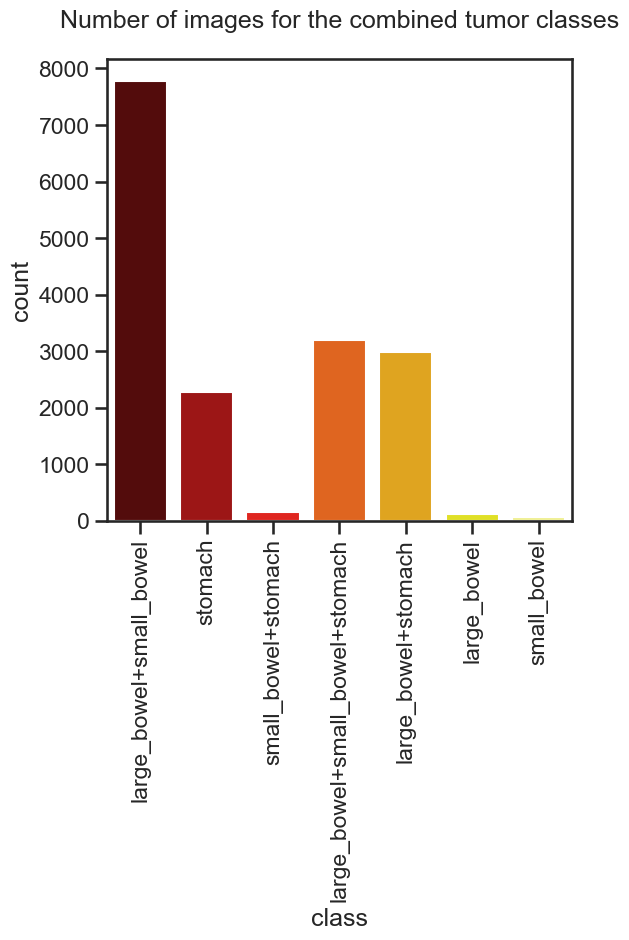

In [86]:

plt.figure(figsize=(6,6))

sns.countplot(data=image_df_unique, x='class', palette='hot')
plt.xticks(rotation=90)
plt.title('Number of images for the combined tumor classes', y=1.05)
plt.show()

In [87]:

data_freq = image_df.groupby('id')[['case','day','slice_id']].first().reset_index()

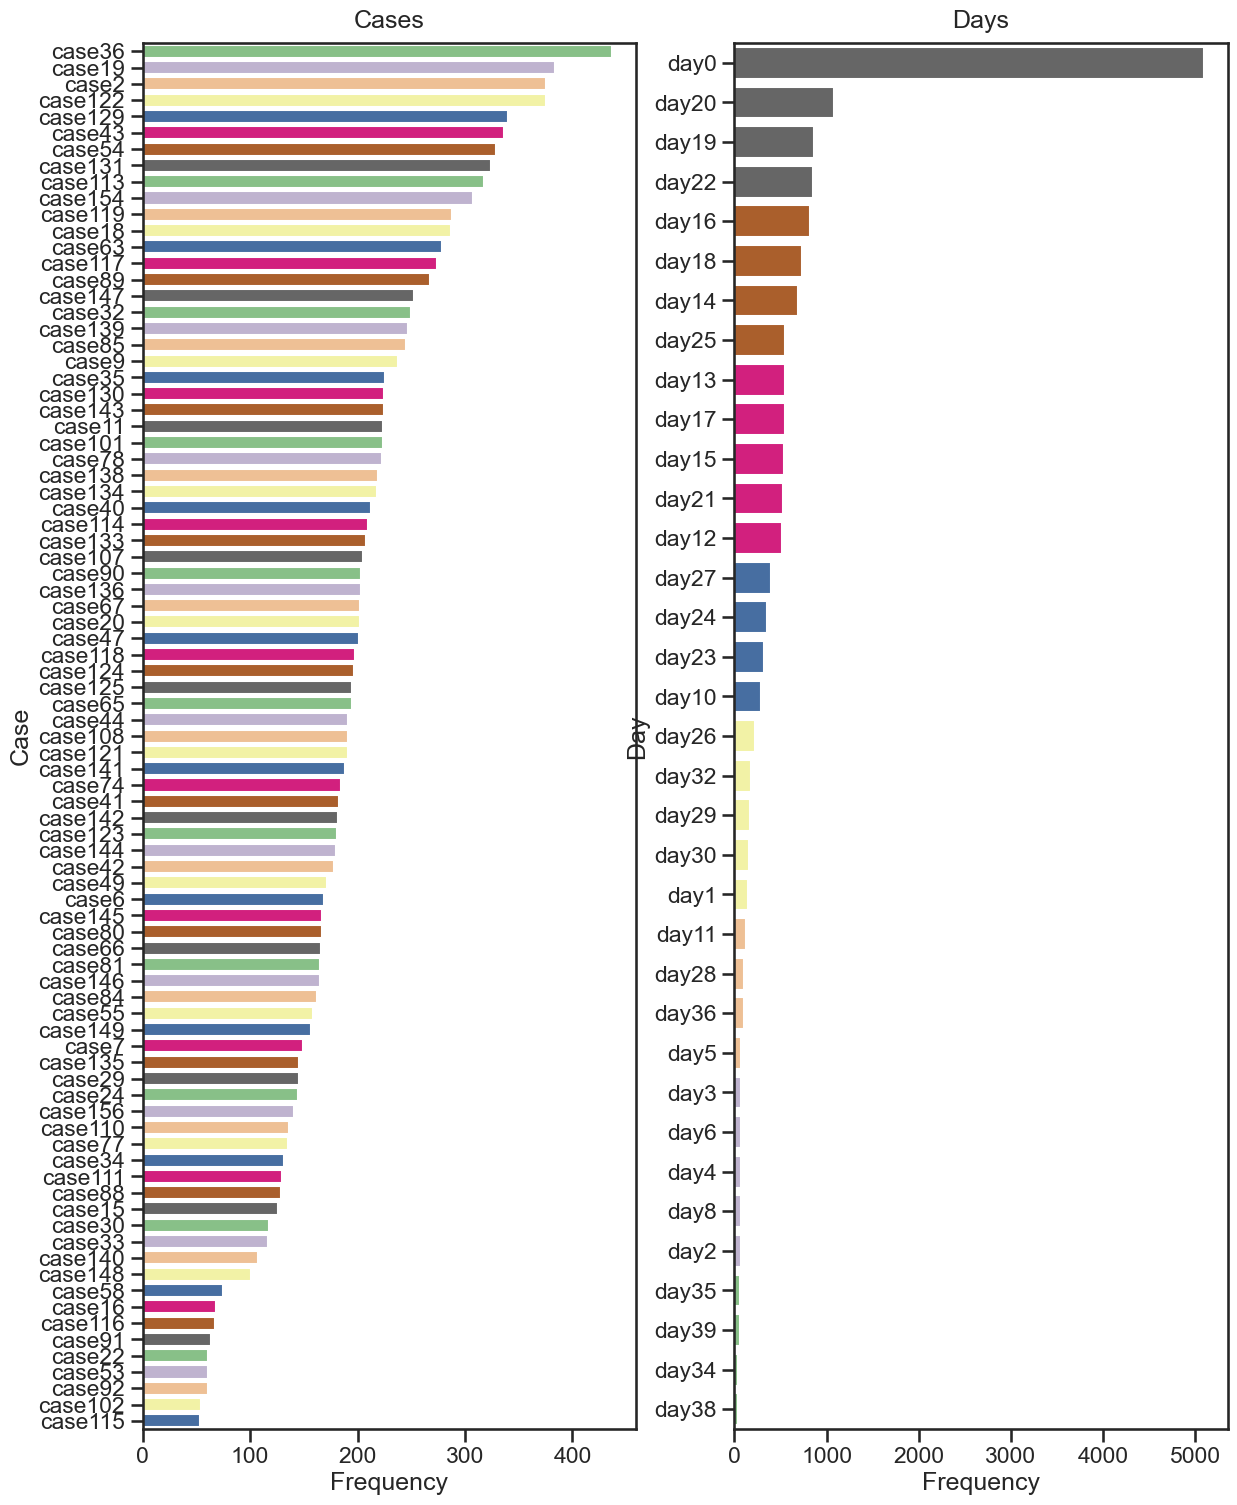

In [90]:
plt.figure(figsize=(14,18))
plt.subplot(1, 2, 1)
c = sns.barplot(data=data_freq['case'].value_counts().reset_index(), y='index', x='case', palette='Accent')
plt.title('Cases', y=1.005)
c.set_xlabel('Frequency')
c.set_ylabel('Case')

plt.subplot(1, 2, 2)
c = sns.barplot(data=data_freq['day'].value_counts().reset_index(), y='index', x='day', palette='Accent_r')
plt.title('Days', y=1.005)
c.set_xlabel('Frequency')
c.set_ylabel('Day')
plt.show()

## Plot Images for Some of the Cases


In [89]:

# Load and save the image files names
path = ''
image_dir = os.path.join('labeled_data')
image_list = os.listdir(image_dir)
image_files = [image_dir+ '/' + i for i in image_list]

In [91]:

image_df[image_df['case']=='case89'].sample(n=10)

id    case    day    slice_id  size_y  size_x  \
20637  case89_day17_slice_0100  case89  day17  slice_0100     360     310   
20339   case89_day0_slice_0075  case89   day0  slice_0075     360     310   
20864  case89_day19_slice_0091  case89  day19  slice_0091     360     310   
20847  case89_day19_slice_0061  case89  day19  slice_0061     360     310   
20466  case89_day20_slice_0084  case89  day20  slice_0084     266     266   
20363   case89_day0_slice_0061  case89   day0  slice_0061     360     310   
20900  case89_day19_slice_0068  case89  day19  slice_0068     360     310   
20869  case89_day19_slice_0073  case89  day19  slice_0073     360     310   
20799  case89_day21_slice_0055  case89  day21  slice_0055     276     276   
20887  case89_day19_slice_0088  case89  day19  slice_0088     360     310   

       spacing_y  spacing_x        class  \
20637       1.50       1.50  large_bowel   
20339       1.50       1.50  large_bowel   
20864       1.50       1.50      stomach   
20847       1.50       1.50  large_bowel   
20466       1.50       1.50  large_bowel   
20363       1.50       1.50  large_bowel   
20900       1.50       1.50  large_bowel   
20869       1.50       1.50  small_bowel   
20799       1.63       1.63  small_bowel   
20887       1.50       1.50  small_bowel   

                                            segmentation  
20637  38990 4 39348 8 39708 13 40067 19 40427 20 407...  
20339  31541 2 31899 7 32258 11 32618 13 32977 16 333...  
20864  36540 4 36894 15 37252 20 37611 22 37970 24 38...  
20847  32625 9 32985 11 33345 12 33705 14 34065 16 34...  
20466  16922 9 17183 22 17393 8 17446 31 17655 14 177...  
20363  32258 3 32616 10 32975 13 33335 16 33694 19 34...  
20900  31542 6 31900 11 32260 14 32620 16 32980 18 33...  
20869  47674 6 48031 10 48390 12 48750 13 49110 13 49...  
20799  20849 1 21113 18 21387 20 21425 8 21661 23 217...  
20887  35526 5 35884 10 36243 12 36602 14 36961 15 37...

/var/folders/cr/w40k5shj6jx8p9z2hxjbn2l40000gn/T/ipykernel_7454/519027253.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(image_path)


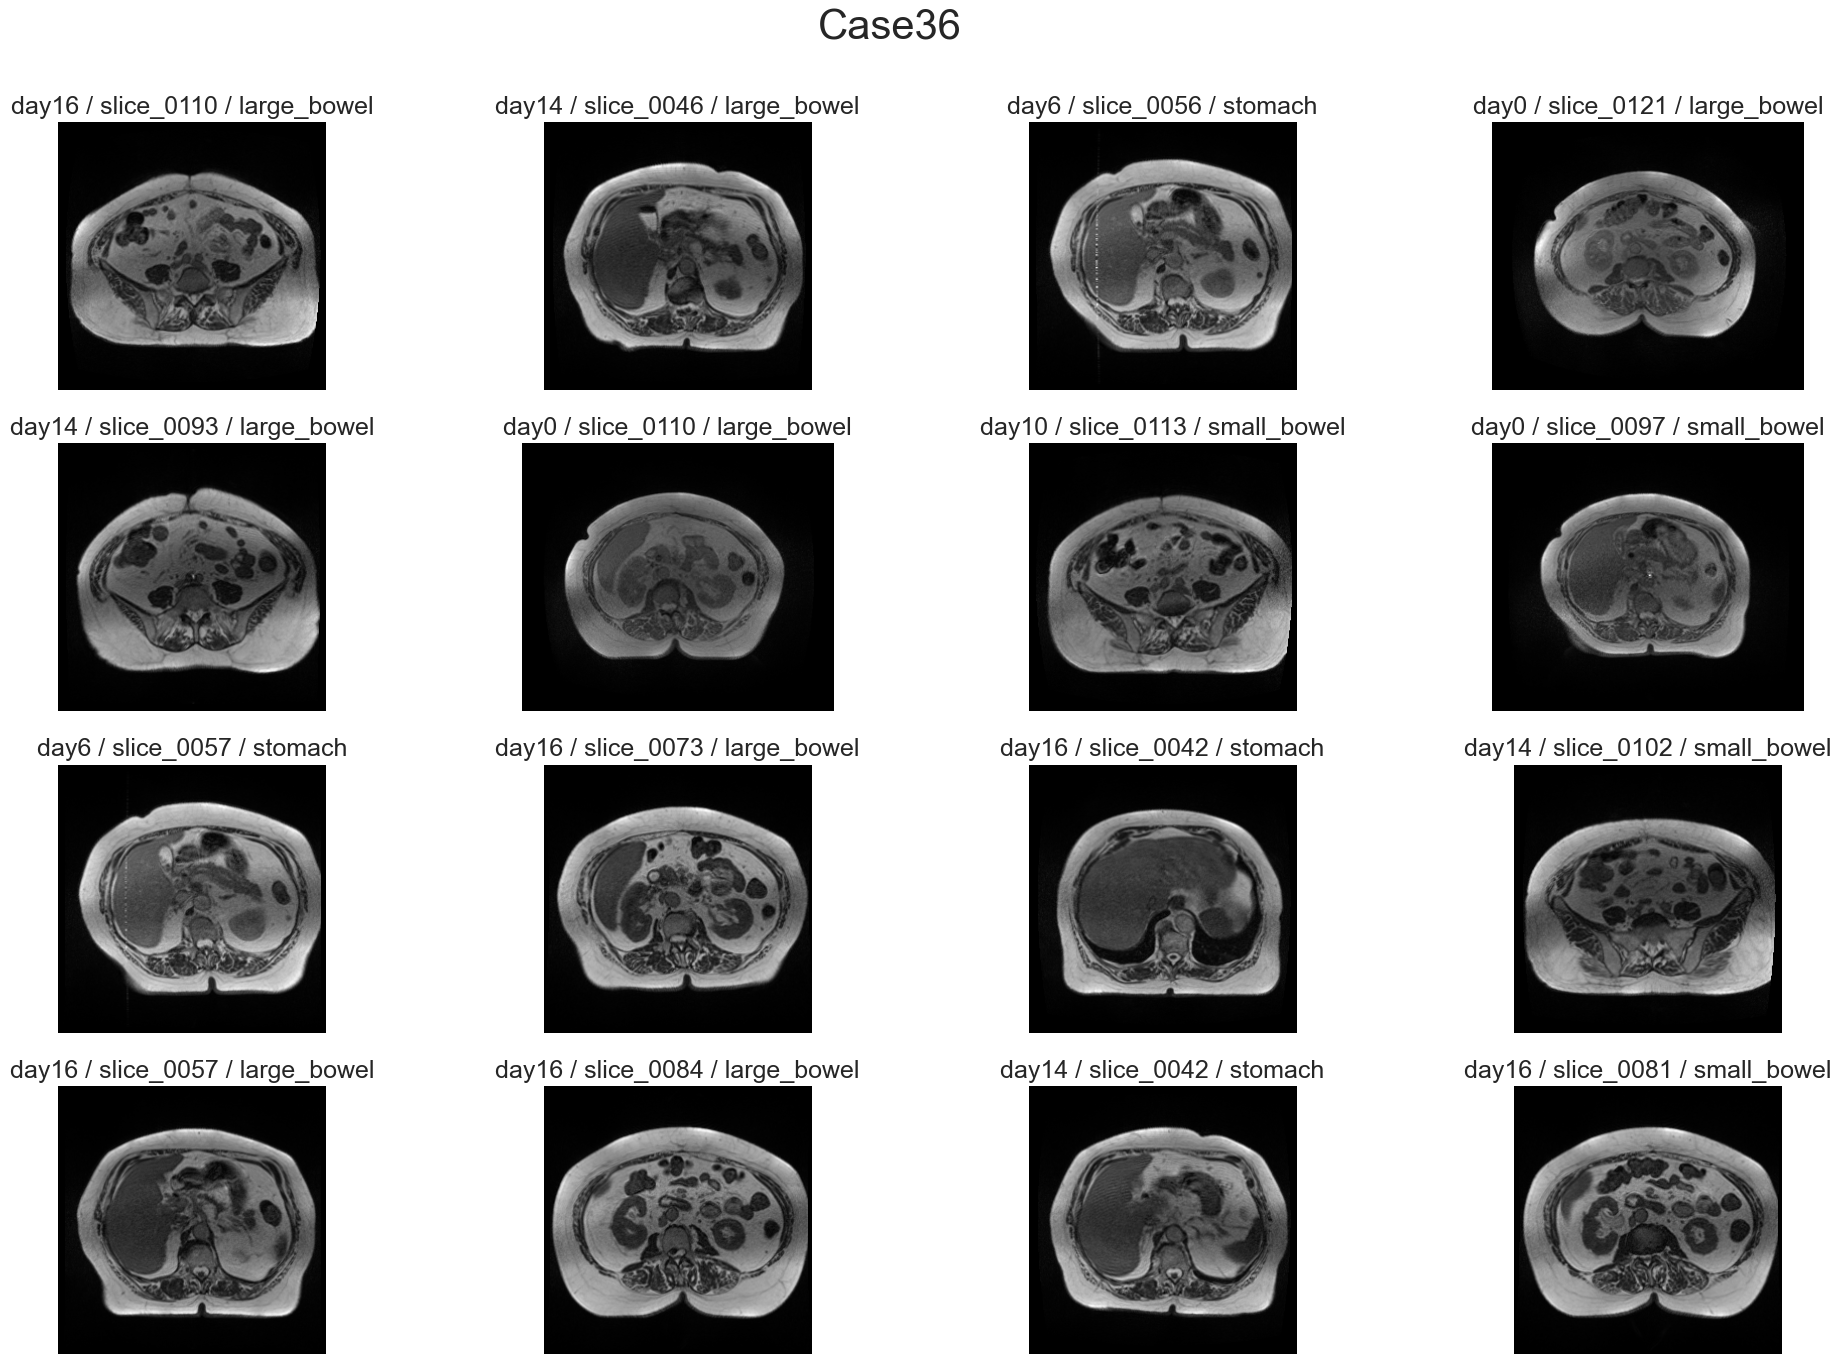

In [92]:
#Case 36
#Case 36 has the highest frequency.

nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(nrows*6, ncols*4)
test_plot = image_df[image_df['case']=='case36'].sample(n=nrows*ncols)

for i in range(nrows * ncols):
  id = test_plot['id'].iloc[i]
  image_path = 'labeled_data'+'/'+id+'.png'
  img = imageio.imread(image_path)
  title = test_plot.iloc[i]['day'] + ' / ' + test_plot.iloc[i]['slice_id'] + ' / ' + test_plot.iloc[i]['class']
  
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')
  plt.suptitle('Case36', fontsize=30, y=0.95)
  plt.title(title)
  plt.imshow(img, cmap='gray')

plt.show()

#  Convert RLE-encoding to mask image

 annotation of images are provided by the RLE-encoding technique. I define a function to convert RLE to masked images. Each class of segmentation is specified with a different label and hence different color in the masked image.

In [106]:
# Define a function to encode RLE to mask image
def rle2mask(id):
    # unique image id
    classes = list(image_df[image_df.id == id]['class'])
    segments = list(image_df[image_df.id == id]['segmentation'])
    input_shape = (image_df[image_df.id == id]['size_x'].iloc[0], image_df[image_df.id == id]['size_y'].iloc[0])
    class_label ={'stomach':1, 'large_bowel':2, 'small_bowel':3}
   

    # Create a zero 2_d array with the image size
    mask_img = np.zeros(input_shape[0] * input_shape[1], dtype=np.uint8)
  
    for i in range(len(segments)):

        # Split the starts pixels and length and store in two arrays
        rle = segments[i]
        label = class_label[classes[i]]
        rle_lst = list(map(int, rle.split()))
        starts, lengths = [np.array(x) for x in (rle_lst[::2], rle_lst[1::2])]

        # deduct 1 from starts to match with the array index
        starts -= 1
        ends = starts + lengths

        for w, h in zip(starts, ends):
            mask_img[w:h] = label

  
    return mask_img.reshape(input_shape)

/var/folders/cr/w40k5shj6jx8p9z2hxjbn2l40000gn/T/ipykernel_7454/4007099319.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(image_path)


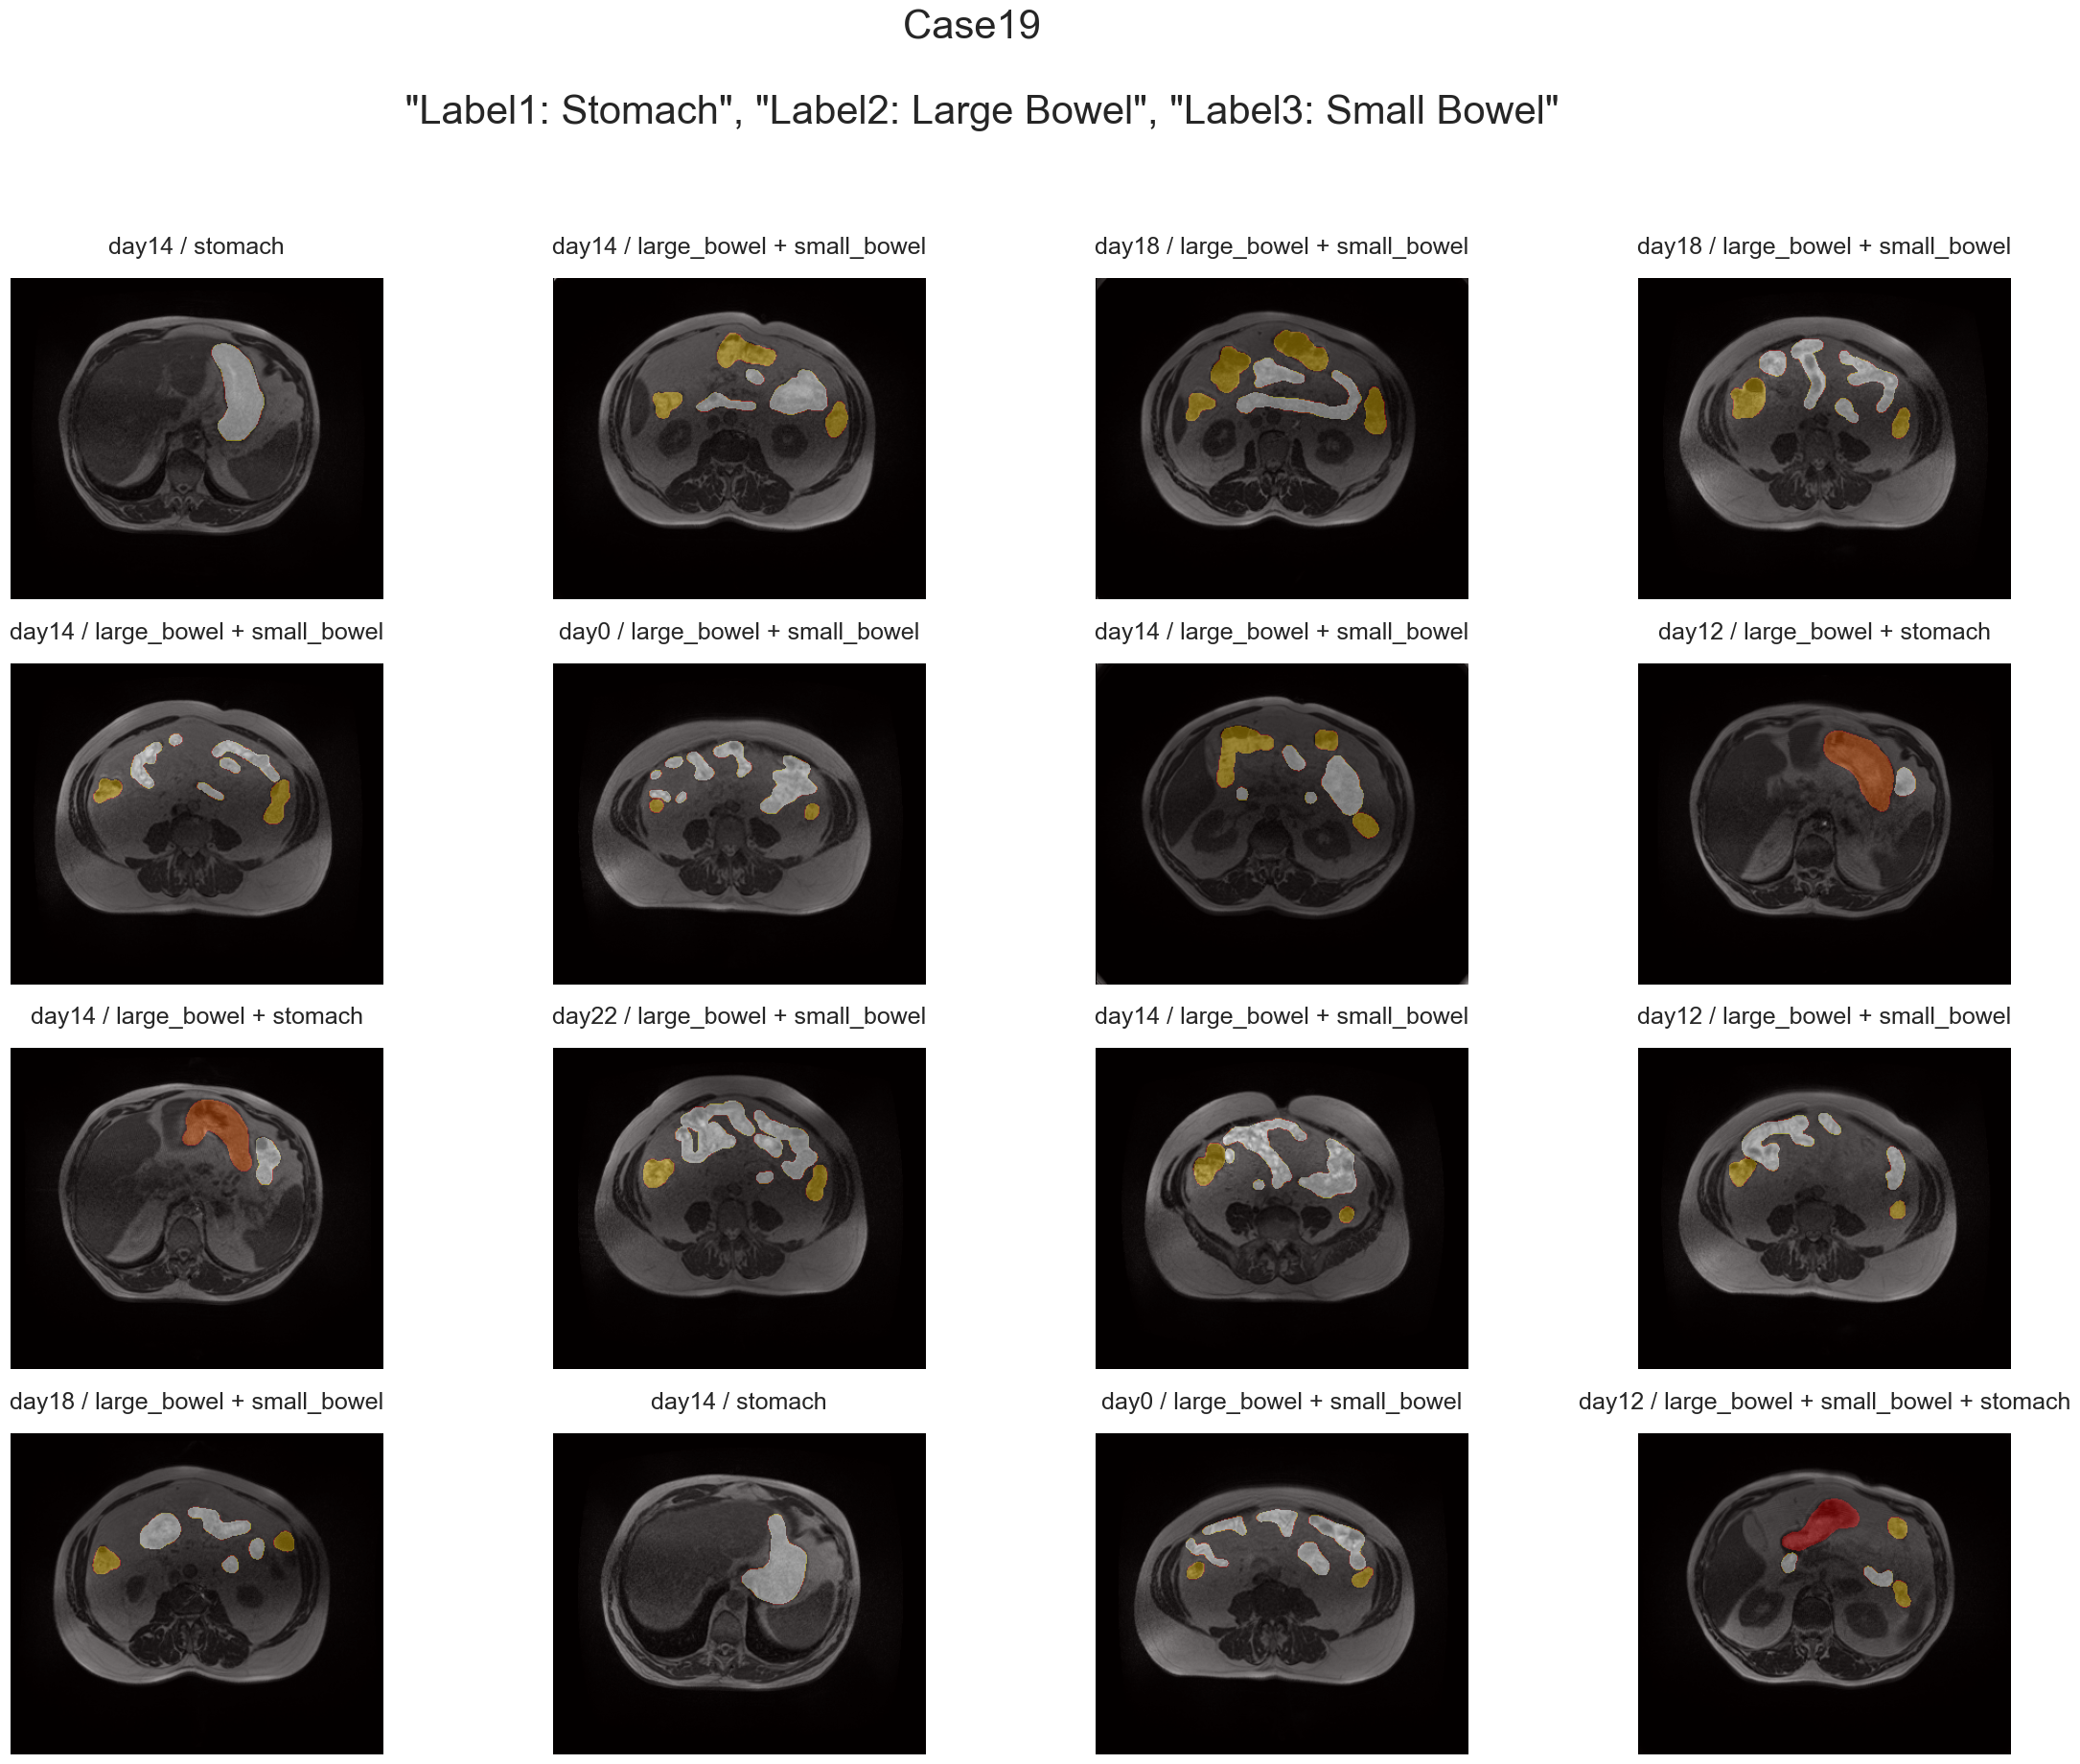

In [112]:
# Plot the masked images and the original ones

nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(nrows*7, ncols*5)
test_plot = image_df[image_df['case']=='case19'].sample(n=nrows*ncols)

for i in range(nrows * ncols):
    id = test_plot['id'].iloc[i]
    image_path = 'labeled_data'+'/'+id+'.png'
    img = imageio.imread(image_path)
    segments = test_plot.iloc[i]['day'] + ' / '+ ' + '.join(list(image_df[image_df['id']==id]['class']))
    title = segments 
    mask = rle2mask(id)

    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    plt.suptitle('Case19 \n \n "Label1: Stomach", "Label2: Large Bowel", "Label3: Small Bowel"', fontsize=30, y=1.02)
    
    plt.title(title, y=1.05)
    plt.imshow(img, cmap='gray')
    plt.imshow(mask, alpha=0.4, cmap='hot')
    #plt.colorbar()

plt.show()

In [121]:

## Create folders to save images and masked images
!mkdir 'cleaned_data'
!mkdir 'cleaned_data/masks'
!mkdir 'cleaned_data/images'
"""!mkdir 'data_images_masked'
!mkdir 'data_images_masked/images'
!mkdir 'data_images_masked/mask'"""

mkdir: cleaned_data: File exists
mkdir: cleaned_data/masks: File exists
mkdir: cleaned_data/images: File exists


"!mkdir 'data_images_masked'\n!mkdir 'data_images_masked/images'\n!mkdir 'data_images_masked/mask'"

In [125]:
labeled_folder = os.path.join('labeled_data')
labeled_files_list = os.listdir(labeled_folder)

In [126]:
print(f'number of masked images: {len(labeled_files_list)}')

number of masked images: 38496


In [ ]:

count_file=0
for root, dirs, files in os.walk('Data/labeled_data'):
    for f in files: 
        if f.endswith('.png'):
            count_file +=1
print(f'number fo images: ',count_file)

In [127]:
 # Save the images and the corresponding masked images in the processed_data

for i in range(image_df_unique.shape[0]):
    # read the id from image_df dataframe
    id = image_df_unique.id.iloc[i]

    # Find the corresponding image
    img_id = 'labeled_data/'+id+'.png'
    img = imageio.imread(img_id)
    mask = rle2mask(id)

    # Save image and its mask

    Image.fromarray(img).save('cleaned_data/images/'+id+'.png')
    Image.fromarray(mask).save('cleaned_data/masks/'+id+'.png')

/var/folders/cr/w40k5shj6jx8p9z2hxjbn2l40000gn/T/ipykernel_7454/2234578559.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_id)


In [129]:
# Check the number of images in each folder

image_folder = os.path.join('cleaned_data/images/')
image_files_list = os.listdir(image_folder)

In [130]:
mask_folder = os.path.join('cleaned_data/masks')
mask_files_list = os.listdir(mask_folder)

In [131]:
print(f'number of images: {len(image_files_list)}')
print(f'number of masked images: {len(mask_files_list)}')

number of images: 16590
number of masked images: 16590


#  Crop Images

In [132]:
# Define the function to crop images
def crop_image_border(img, mask, tol=0):
  '''
    crops the black border of images
    img: unmasked image
    mask: masked image
    tol: pixel tolerance for cropping images

    return: cropped unmasked and masked image

  '''

  row_start_general  = 10000
  col_start_general = 10000
  row_end_general = 0
  col_end_general = 0

  img = np.array(img, dtype=int)
  mask = np.array(mask, dtype=int)

  img_max = np.max(img)
  img = img / img_max

  mask_max = np.max(mask)
  mask = mask / mask_max

  border = img > tol

  if img.ndim == 3:
    border = border.all(2)

  m,n = border.shape
  border0, border1 = border.any(0), border.any(1)
  col_start, col_end = border0.argmax(), n-border0[::-1].argmax()
  row_start, row_end = border1.argmax(), m-border1[::-1].argmax()

  row_start_general = min(row_start, row_start_general)
  row_end_general = max(row_end, row_end_general)

  col_start_general = min(col_start, col_start_general)
  col_end_general = max(col_end, col_end_general)

  cropped_img = img[row_start_general:row_end_general, col_start_general:col_end_general]
  cropped_mask = mask[row_start_general:row_end_general, col_start_general:col_end_general]

  return cropped_img, cropped_mask

/var/folders/cr/w40k5shj6jx8p9z2hxjbn2l40000gn/T/ipykernel_7454/4033831181.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(image_path)
/var/folders/cr/w40k5shj6jx8p9z2hxjbn2l40000gn/T/ipykernel_7454/4033831181.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(mask_path)


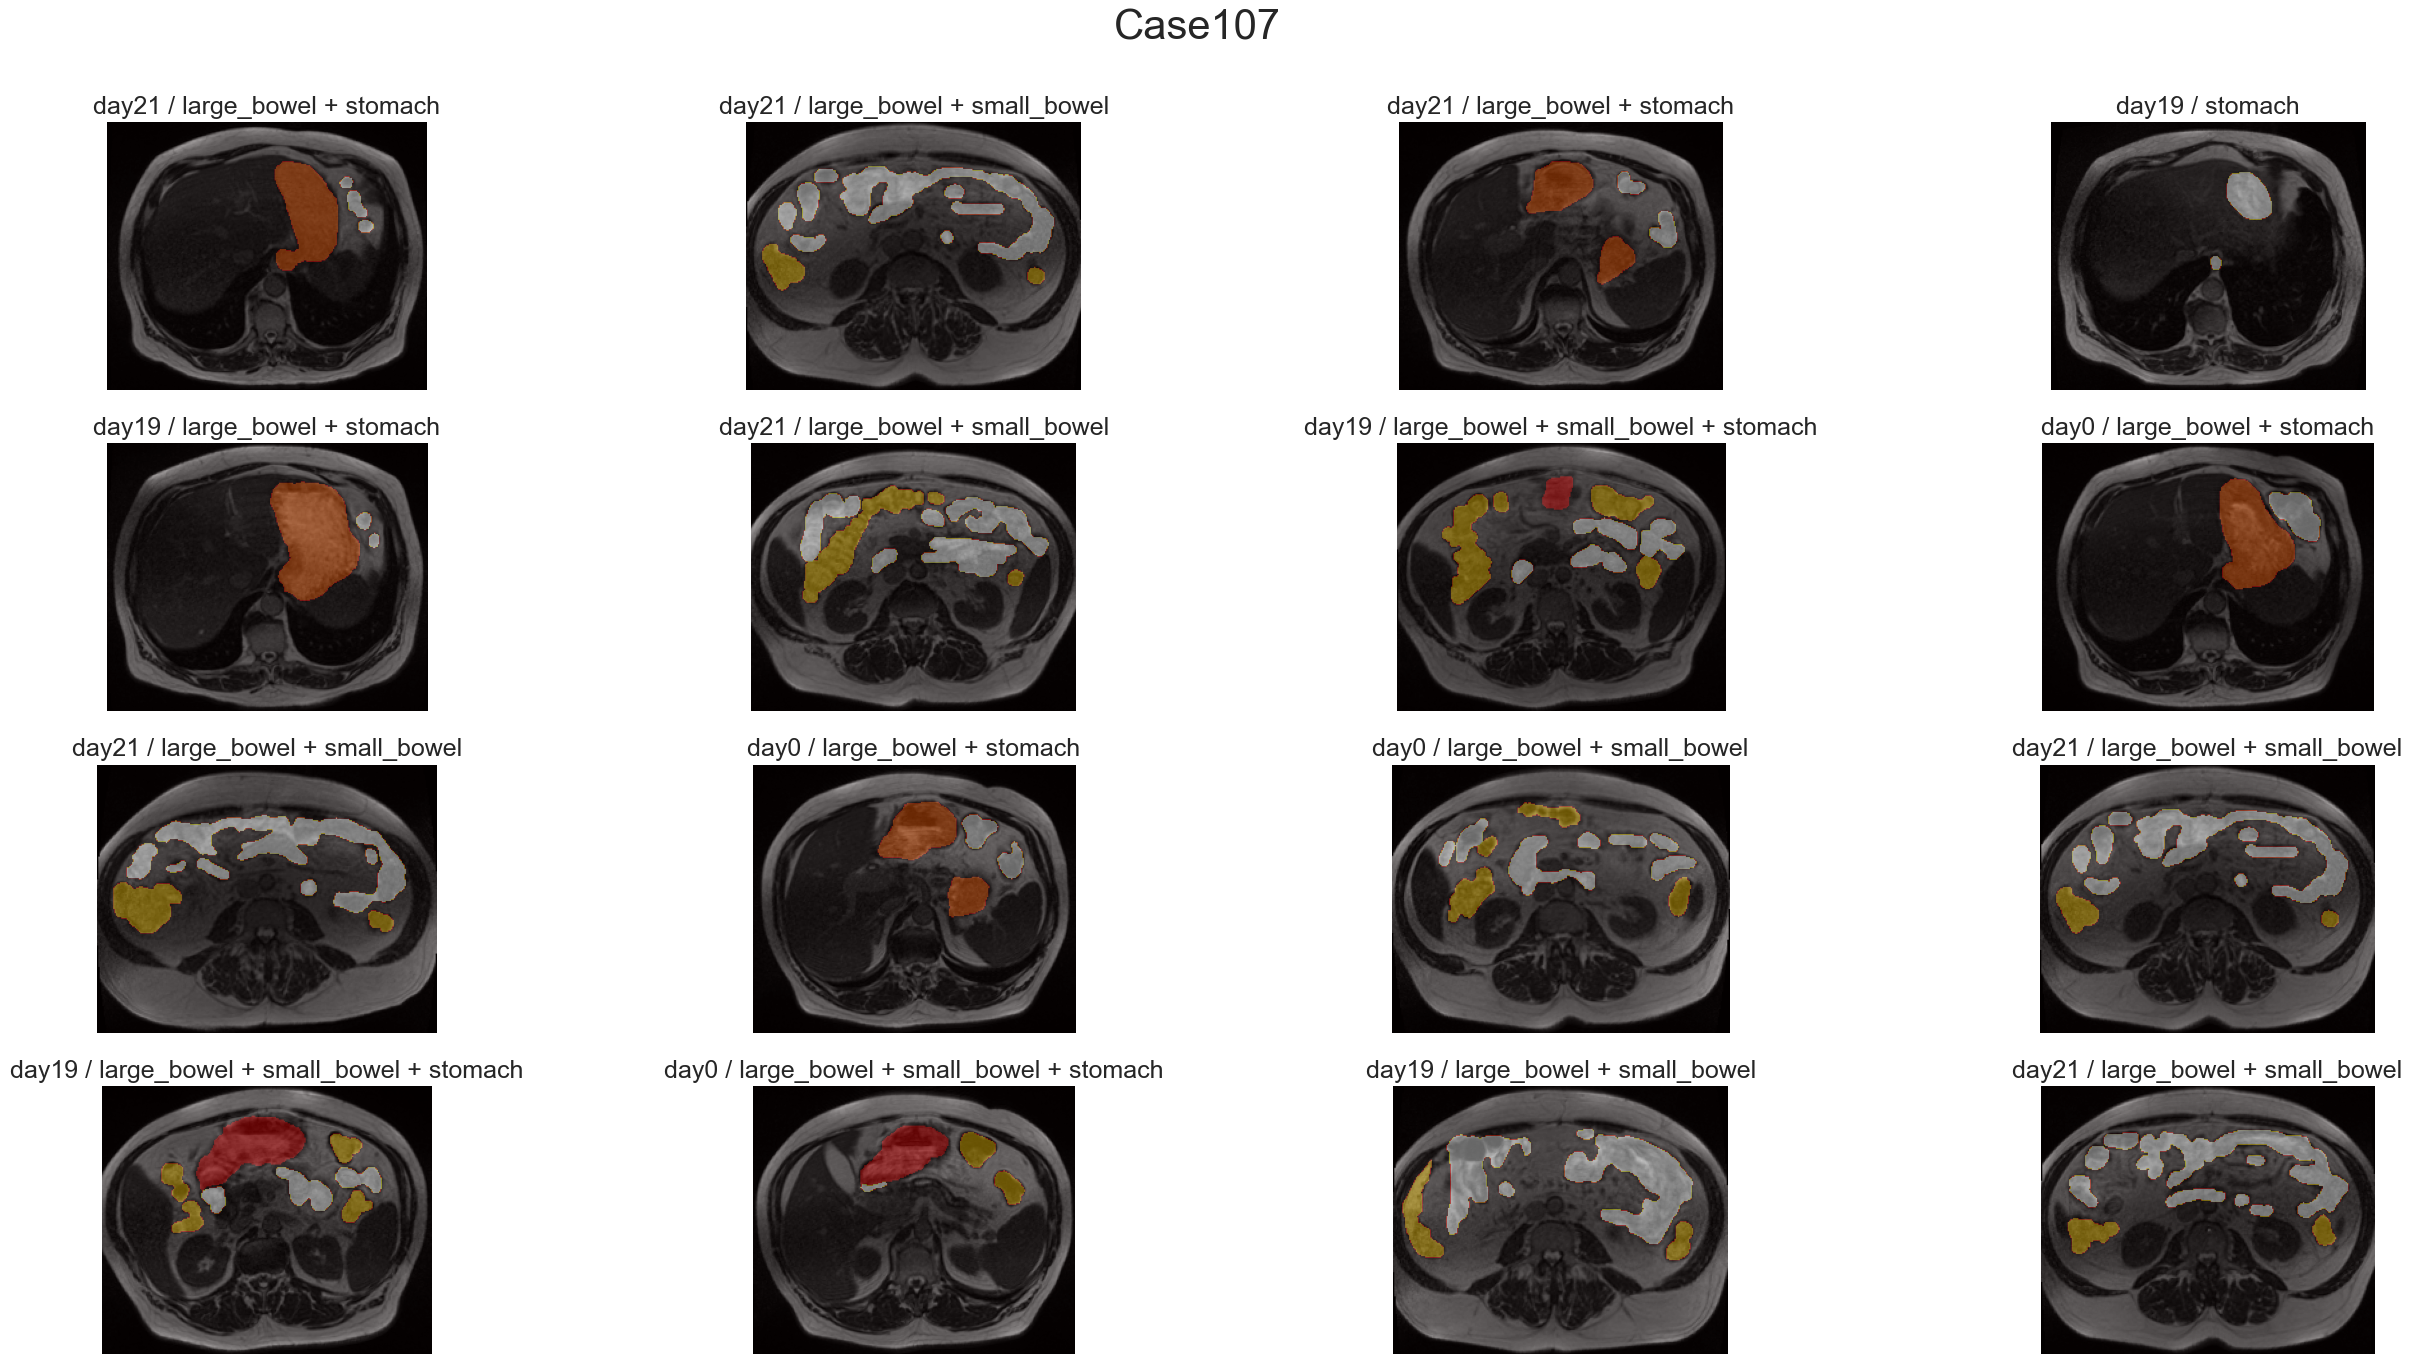

In [133]:
# Check out the crop function outputs

nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(nrows*8, ncols*4)
test_plot = image_df[image_df['case']=='case107'].sample(n=nrows*ncols)

for i in range(nrows * ncols):
  id = test_plot['id'].iloc[i]
  image_path = 'cleaned_data/images'+'/'+id+'.png'
  mask_path = 'cleaned_data/masks'+'/'+id+'.png'
  img = imageio.imread(image_path)
  mask = imageio.imread(mask_path)
  segments = test_plot.iloc[i]['day'] + ' / '+ ' + '.join(list(image_df[image_df['id']==id]['class']))
  title = segments 
  img, mask = crop_image_border(img, mask, tol=0.05)
  
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')
  plt.suptitle('Case107', fontsize=30, y=0.95)
  plt.title(title)
  plt.imshow(img, cmap='gray')
  plt.imshow(mask, alpha=0.4, cmap='hot')

plt.show()
     

In [134]:

# # Make directories to save cropped images and masks
!mkdir 'cleaned_data/cropped_masks'
!mkdir 'cleaned_data/cropped_images'
     

In [135]:
for i in range(image_df_unique.shape[0]):
    #   # read the id from image_df dataframe
    id = image_df_unique.id.iloc[i]

    # Find the corresponding image
    img_id = 'cleaned_data/images/'+id+'.png'
    mask_id = 'cleaned_data/masks/'+id+'.png'
    img = imageio.imread(img_id)
    mask = imageio.imread(mask_id)

    cropped_img, cropped_mask = crop_image_border(img, mask, tol=0.05)

    # Save image and its mask
    cropped_image = Image.fromarray(np.uint8(cropped_img * 255)).convert('RGB').save('cleaned_data/cropped_images/'+id+'.png')
    cropped_mask = Image.fromarray(np.uint8(cropped_mask * 255)).convert('RGB').save('cleaned_data/cropped_masks/'+id+'.png')


/var/folders/cr/w40k5shj6jx8p9z2hxjbn2l40000gn/T/ipykernel_7454/3356700100.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_id)
/var/folders/cr/w40k5shj6jx8p9z2hxjbn2l40000gn/T/ipykernel_7454/3356700100.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(mask_id)


In [142]:

count_file=0
for root, dirs, files in os.walk('cleaned_data/cropped_images'):
    for f in files: 
        if f.endswith('.png'):
            count_file +=1
print(f'number fo images: ',count_file)

number fo images:  16590


In [143]:

count_file=0
for root, dirs, files in os.walk('cleaned_data/cropped_masks'):
    for f in files: 
        if f.endswith('.png'):
            count_file +=1
print(f'number fo images: ',count_file)

number fo images:  16590


# Part 3